In [3]:
!nvidia-smi

'nvidia-smi' is not recognized as an internal or external command,
operable program or batch file.


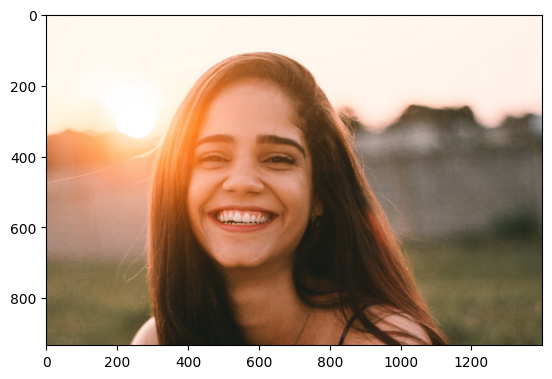

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import cv2
import os

# image data generator is the package to label the images & it will automatically

img = image.load_img(r'training\happy\1HEoLBLidT2u4mhJ0oiDgig.png')
plt.imshow(img)

Image shape: (933, 1400, 3)
Preprocessed image shape: (1, 933, 1400, 3)


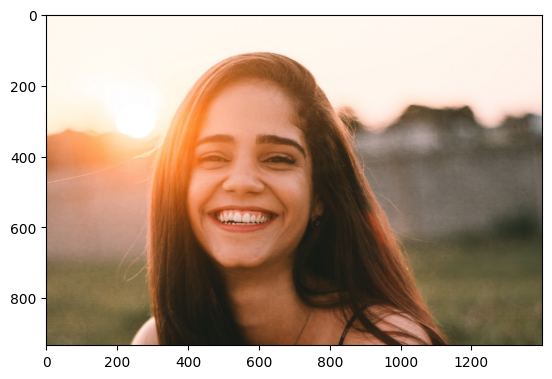

In [5]:
# Convert the loaded image to array
img_array = image.img_to_array(img)

# Display the image array shape
print("Image shape:", img_array.shape)

# Expand dimensions to match the model input (batch size, height, width, channels)
img_array = np.expand_dims(img_array, axis=0)

# Normalize the image (important for neural networks)
img_array = img_array / 255.0

print("Preprocessed image shape:", img_array.shape)

# If you want to visualize the image again
plt.imshow(img_array[0])
plt.show()

In [6]:
train = ImageDataGenerator(rescale=1/255)
validation = ImageDataGenerator(rescale=1/255)

In [8]:
train_dataset = train.flow_from_directory('training',
                                          target_size=(200,200),
                                          batch_size=10,
                                          class_mode='binary')

Found 167 images belonging to 2 classes.


In [9]:
train_dataset = train.flow_from_directory('training',
                                          target_size=(200,200),
                                          batch_size=10,
                                          class_mode='binary')

validation_dataset = validation.flow_from_directory('validation',
                                          target_size=(200,200),
                                          batch_size=10,
                                          class_mode='binary')

train_dataset.class_indices
train_dataset.classes

Found 167 images belonging to 2 classes.
Found 62 images belonging to 2 classes.


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [10]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(200, 200, 3)),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),

    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

c:\Users\dell\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 198, 198, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 99, 99, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 97, 97, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 48, 48, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 46, 46, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 33856)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    17,334,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,358,881 (66.22 MB)

 Trainable params: 17,358,881 (66.22 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001),
              metrics=['accuracy'])

In [12]:
model_fit = model.fit(train_dataset,
                      epochs=10)

c:\Users\dell\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10


: 

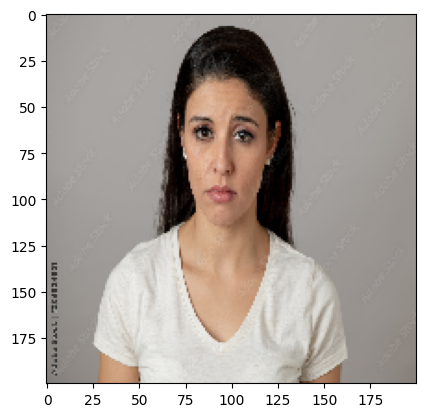

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
i am sad


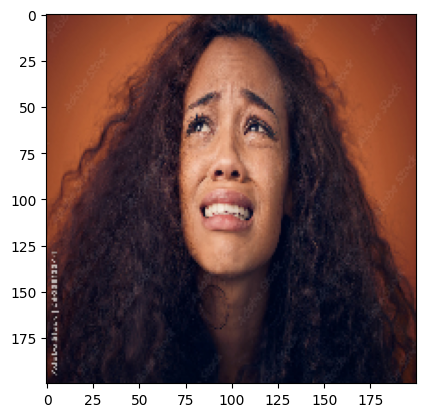

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
i am sad


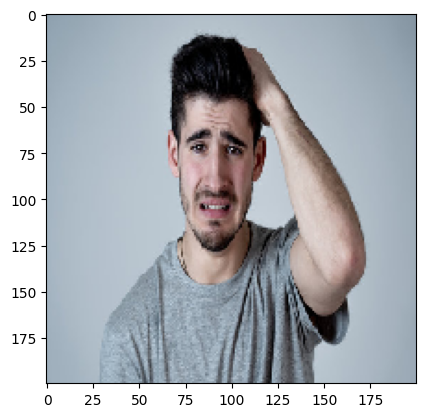

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
i am sad


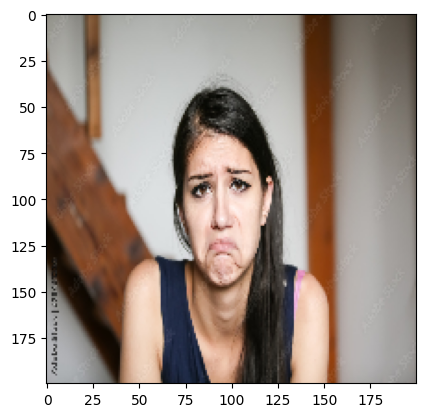

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
i am sad


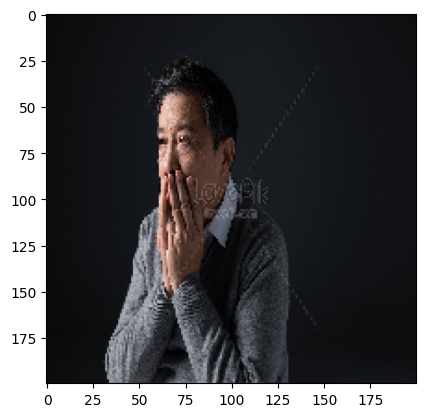

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
i am sad


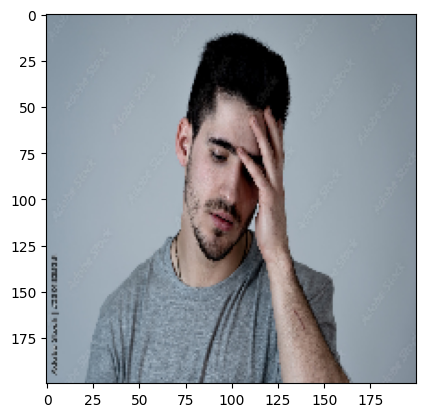

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
i am sad


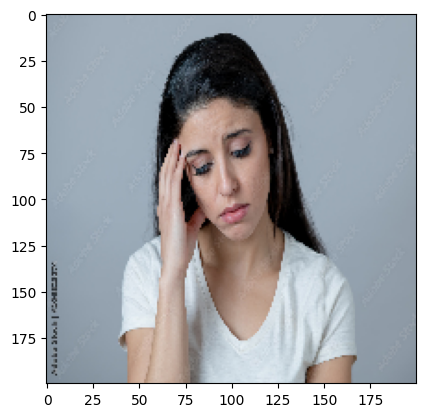

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
i am sad


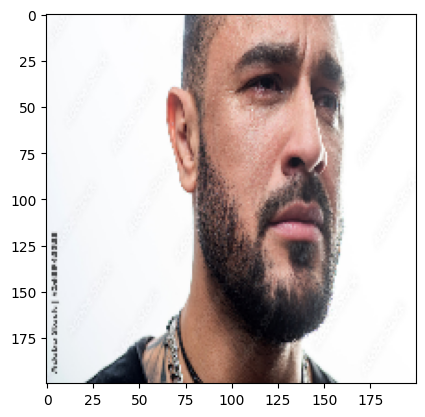

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
i am sad


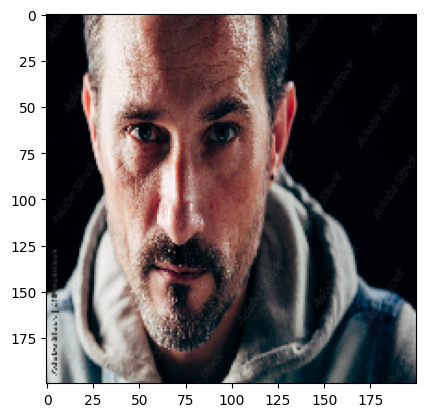

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
i am sad


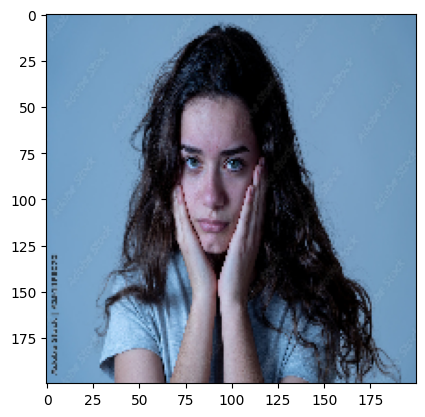

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
i am sad


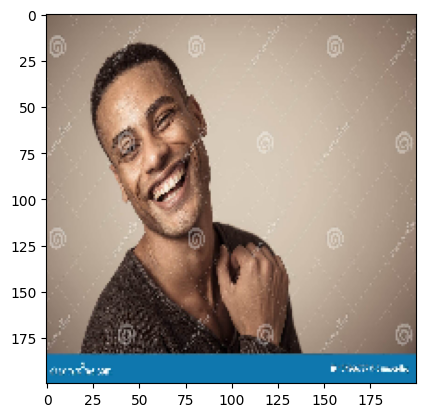

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
i am happy


In [ ]:
dir_path = '/content/drive/MyDrive/testing'

for i in os.listdir(dir_path):
  img = image.load_img(dir_path+'//'+i, target_size=(200,200))
  plt.imshow(img)
  plt.show()

  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])

  val = model.predict(images)
  if val == 0:
    print('i am happy')
  else:
    print('i am sad')

In [ ]:
!nvidia-smi

Thu Oct  9 06:30:21 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   65C    P0             28W /   70W |    1146MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

### Evaluate the model
Let's evaluate the model's performance on the validation dataset.